##구글 드라이브 연동
-본 파일은 코랩에서 작성되었습니다.


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


##데이터 불러오기
-트레이닝 데이터와 테스트 데이터가 저장되어있는 폴더경로를 변수에 저장시킵니다.

In [ ]:
root_path = '/content/drive/MyDrive/pic2/train_set'

In [ ]:
root_path1 = '/content/drive/MyDrive/pic2/test_set'

##데이터 파일 전처리
-데이터(사진) 파일을 전처리 시켜줍니다

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
train = ImageDataGenerator( rescale = 1.0/255. )
test = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_data = train.flow_from_directory(root_path, batch_size=20, class_mode='binary', target_size=(150, 150))

Found 8005 images belonging to 2 classes.


In [ ]:
test_data = test.flow_from_directory(root_path1, batch_size=20, class_mode='binary', target_size=(150, 150))

Found 2023 images belonging to 2 classes.


##모델 생성

In [ ]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(32,(2,2),input_shape=(150,150,3)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
learning_rate = 0.001
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
history = model1.fit(train_data, validation_data=test_data, steps_per_epoch=10,
                      epochs=10, validation_steps=5, verbose=2)

Epoch 1/10
10/10 - 19s - loss: 14.5276 - accuracy: 0.5000 - val_loss: 8.2265 - val_accuracy: 0.5200 - 19s/epoch - 2s/step
Epoch 2/10
10/10 - 21s - loss: 4.7236 - accuracy: 0.5300 - val_loss: 2.2391 - val_accuracy: 0.6300 - 21s/epoch - 2s/step
Epoch 3/10
10/10 - 21s - loss: 3.4953 - accuracy: 0.5650 - val_loss: 1.9402 - val_accuracy: 0.5400 - 21s/epoch - 2s/step
Epoch 4/10
10/10 - 16s - loss: 2.6130 - accuracy: 0.4950 - val_loss: 1.9865 - val_accuracy: 0.5700 - 16s/epoch - 2s/step
Epoch 5/10
10/10 - 22s - loss: 1.5674 - accuracy: 0.5200 - val_loss: 1.3626 - val_accuracy: 0.5400 - 22s/epoch - 2s/step
Epoch 6/10
10/10 - 17s - loss: 1.3816 - accuracy: 0.5500 - val_loss: 1.7367 - val_accuracy: 0.4900 - 17s/epoch - 2s/step
Epoch 7/10
10/10 - 18s - loss: 1.3739 - accuracy: 0.5700 - val_loss: 0.9318 - val_accuracy: 0.6600 - 18s/epoch - 2s/step
Epoch 8/10
10/10 - 14s - loss: 1.2464 - accuracy: 0.5550 - val_loss: 0.8015 - val_accuracy: 0.5600 - 14s/epoch - 1s/step
Epoch 9/10
10/10 - 13s - loss: 

##예측률이 낮아 다시 모델 생성

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
learning_rate = 0.001
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
history = model2.fit(train_data, validation_data = test_data, steps_per_epoch=50,
                      epochs=30, validation_steps=50, verbose=2)

Epoch 1/30
50/50 - 11s - loss: 0.7626 - accuracy: 0.5090 - val_loss: 0.6878 - val_accuracy: 0.5250 - 11s/epoch - 226ms/step
Epoch 2/30
50/50 - 10s - loss: 0.6904 - accuracy: 0.5670 - val_loss: 0.6773 - val_accuracy: 0.5960 - 10s/epoch - 205ms/step
Epoch 3/30
50/50 - 11s - loss: 0.6799 - accuracy: 0.5760 - val_loss: 0.6750 - val_accuracy: 0.5420 - 11s/epoch - 211ms/step
Epoch 4/30
50/50 - 11s - loss: 0.6558 - accuracy: 0.6170 - val_loss: 0.6416 - val_accuracy: 0.6550 - 11s/epoch - 213ms/step
Epoch 5/30
50/50 - 10s - loss: 0.6321 - accuracy: 0.6528 - val_loss: 0.7639 - val_accuracy: 0.5000 - 10s/epoch - 206ms/step
Epoch 6/30
50/50 - 10s - loss: 0.6798 - accuracy: 0.6000 - val_loss: 0.6356 - val_accuracy: 0.6440 - 10s/epoch - 206ms/step
Epoch 7/30
50/50 - 11s - loss: 0.6157 - accuracy: 0.6570 - val_loss: 0.6114 - val_accuracy: 0.6880 - 11s/epoch - 214ms/step
Epoch 8/30
50/50 - 10s - loss: 0.5934 - accuracy: 0.6850 - val_loss: 0.5977 - val_accuracy: 0.6940 - 10s/epoch - 205ms/step
Epoch 9/

##결과 출력
-결과 사진이 있는 폴더 경로를 지정하여 그 사진이 강아지인지 고양이인지를 나타냅니다.

-강아지 사진은 값이 50 초과한 값으로 나오고 고양이 사진은 50 미만 값으로 출력되어 조건식을 적용시켰습니다. 

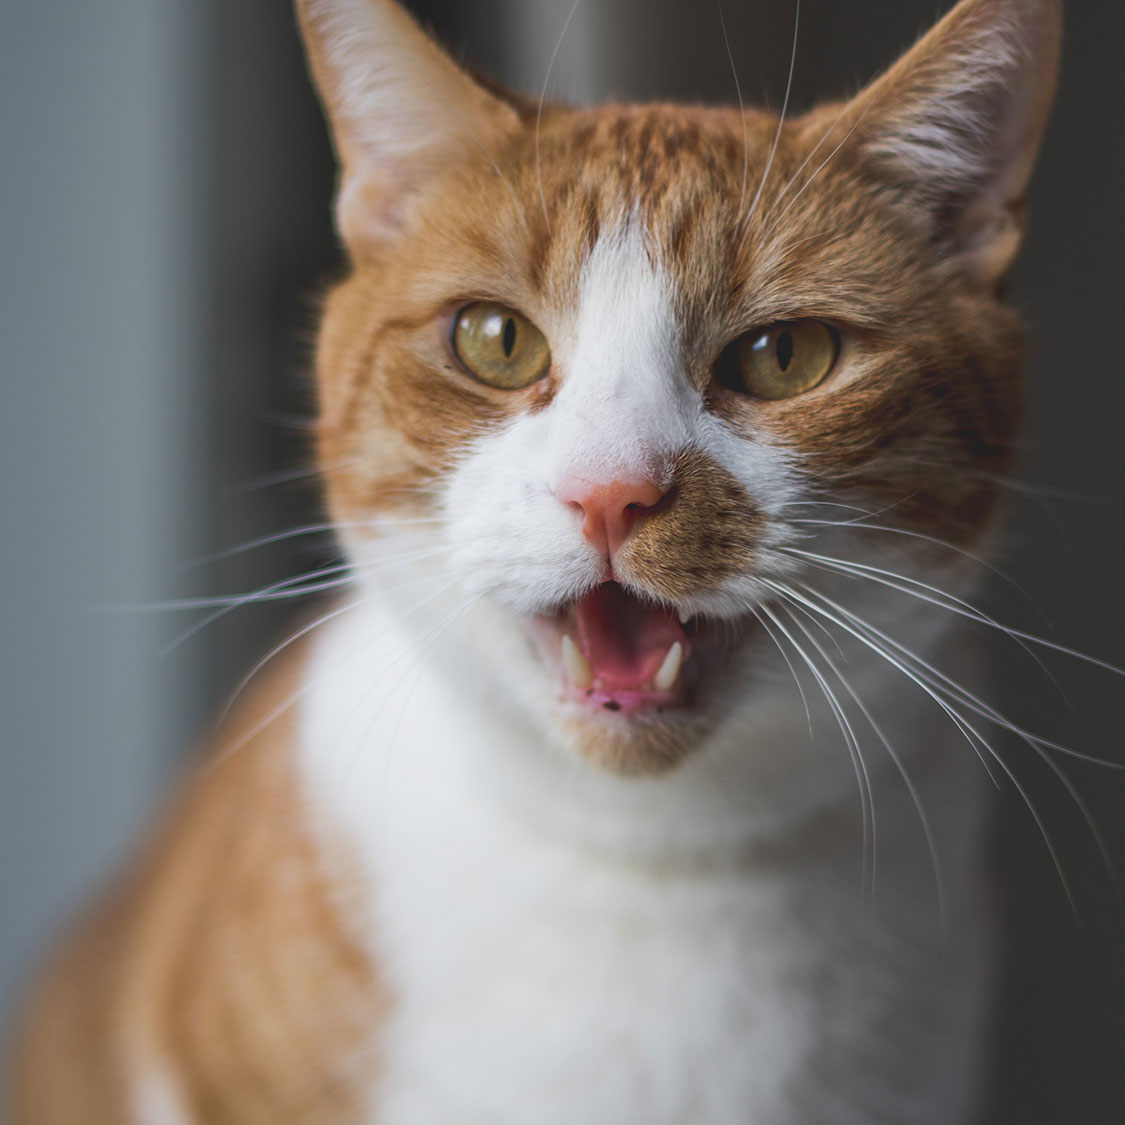

##위의 이미지로 결과를 분석해보겠습니다.

In [ ]:
test1 = ImageDataGenerator( rescale = 1.0/255. )
test_dat3 = test1.flow_from_directory('/content/test1', batch_size=20, class_mode='binary', target_size=(150, 150))
y_pre = model2.predict(test_dat3)
if (y_pre)*100 > 50:
  print('개')
else:
  print('고양이')

Found 1 images belonging to 2 classes.
고양이
